In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Import data**

In [2]:
df = pd.read_excel("Data.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**Convert columns type to datetime**

In [7]:
%%capture
def change_into_datetime(column):
    df[column] = pd.to_datetime(df[column])

for columns in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(columns)

In [8]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [9]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop('Date_of_Journey', axis=1,inplace=True)

In [10]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-22 05:50:00,2022-06-22 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-22 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-06-22 18:05:00,2022-06-22 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-06-22 16:50:00,2022-06-22 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [11]:
def extract_hour(df,column):
    df[column+'_hour'] = df[column].dt.hour

def extract_min(df,column):
    df[column+'_minute'] = df[column].dt.minute

def drop_column(df,column):
    df.drop(column,axis=1, inplace=True)


In [12]:
extract_hour(df,'Dep_Time')
extract_min(df, 'Dep_Time')
drop_column(df, 'Dep_Time')

extract_hour(df,'Arrival_Time')
extract_min(df, 'Arrival_Time')
drop_column(df, 'Arrival_Time')

In [13]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


**Preprocessing  on "duration" column**

In [14]:
duration = list(df["Duration"])
duration = [x if len(x.split(" ")) == 2 else x + " 0m" if "h" in x else "0h " + x for x in duration]
df["Duration"] = duration

In [15]:
df.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
def hour(x):
   return x.split(" ")[0][0:-1]

def minute(x):
   return x.split(" ")[1][0:-1]

In [17]:
df["Duration_hours"] = df["Duration"].apply(hour).astype(int)
df["Duration_mins"] = df["Duration"].apply(minute).astype(int)
drop_column(df, "Duration")

In [18]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [19]:
cat_col = [col for col in df.columns if df[col].dtype == object]
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [20]:
cont_col = [col for col in df.columns if df[col].dtype != object]
cont_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

**Preprocessing categorical data**

In [21]:
categorical = df[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [22]:
categorical["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**Price analysis**

<AxesSubplot:xlabel='Airline', ylabel='Price'>

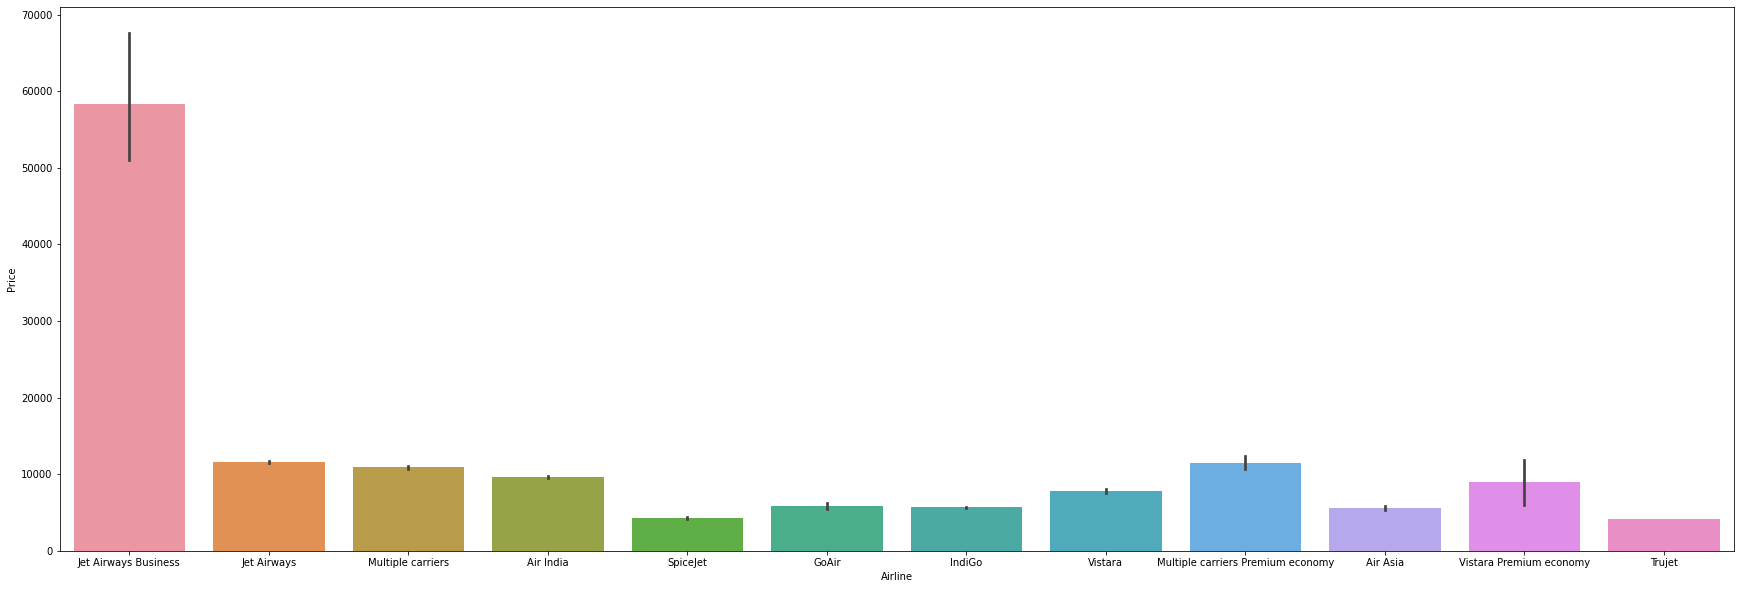

In [23]:
plt.figure(figsize = (30,10))
sns.barplot(x = "Airline", y = "Price", data = df.sort_values("Price", ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

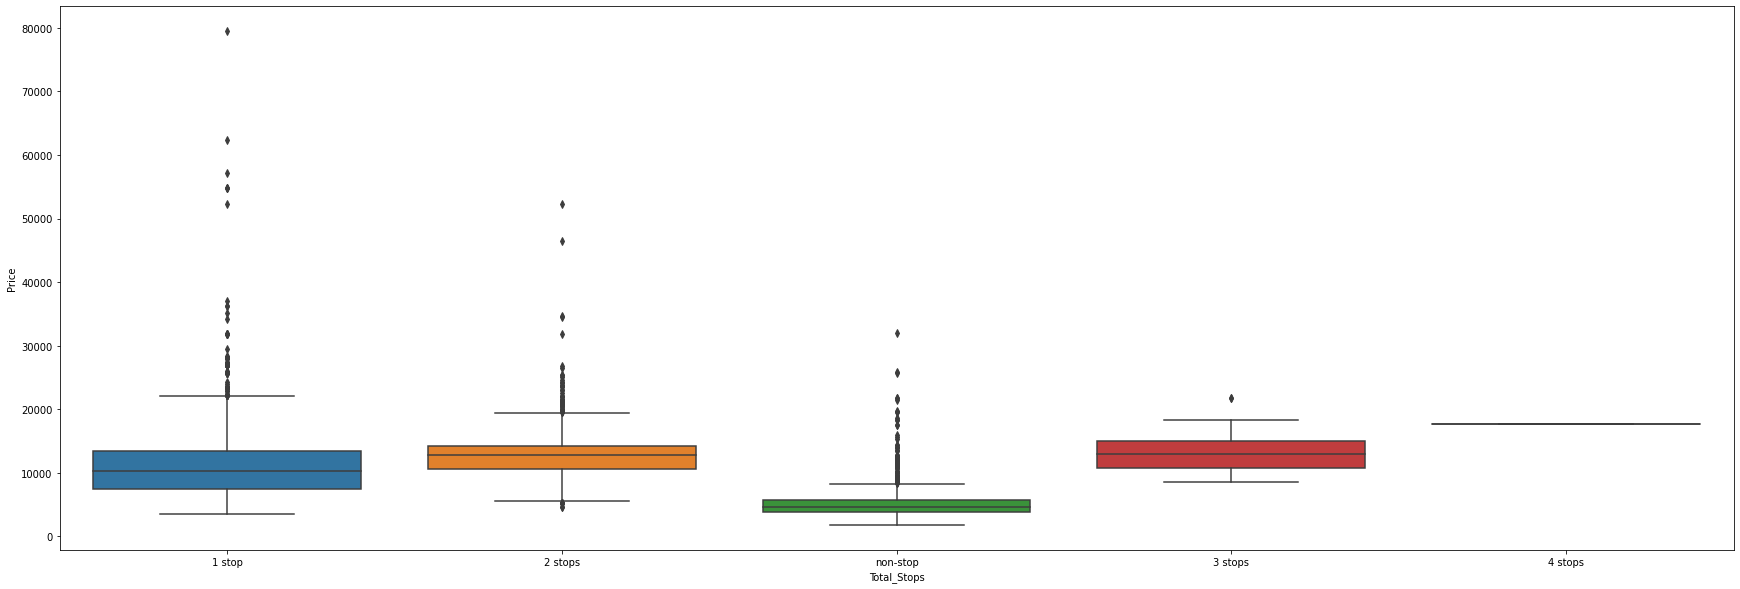

In [76]:
plt.figure(figsize = (30,10))
sns.boxplot(x = "Total_Stops", y = "Price", data = df.sort_values("Price", ascending=False))

In [25]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

def encode(col):
    column = pd.get_dummies(categorical[col], drop_first=False).columns

    df = pd.DataFrame(encoder.fit_transform(np.array(categorical[col]).reshape(-1, 1)), columns = column)

    return df

In [26]:
Airline = encode('Airline')
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
Source = encode('Source')
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [28]:
Destination = encode('Destination')
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
%%capture
categorical["Route_1"] = categorical["Route"].str.split("→").str[0]
categorical["Route_2"] = categorical["Route"].str.split("→").str[1]
categorical["Route_3"] = categorical["Route"].str.split("→").str[2]
categorical["Route_4"] = categorical["Route"].str.split("→").str[3]
categorical["Route_5"] = categorical["Route"].str.split("→").str[4]

drop_column(categorical,"Route")
categorical.fillna("NaN", inplace=True)

In [30]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [31]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [32]:
for x in categorical.columns:
    print(f"{x} has total {len(categorical[x].value_counts())} categories")

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 45 categories
Route_3 has total 30 categories
Route_4 has total 14 categories
Route_5 has total 6 categories


In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
%%capture
encoder = LabelEncoder()

for x in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[x] = encoder.fit_transform(categorical[x])

In [35]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [36]:
drop_column(categorical,"Additional_Info")

/tmp/ipykernel_22451/1922644037.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(column,axis=1, inplace=True)


In [37]:
categorical["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [38]:
dict = {'non-stop': 0, '2 stops': 2, '1 stop': 1, '3 stops': 3, '4 stops': 4}
categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)

/tmp/ipykernel_22451/1552981070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['Total_Stops'] = categorical['Total_Stops'].map(dict)


In [39]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5
1,Air India,Kolkata,Banglore,2,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5


In [40]:
data_train = pd.concat([categorical,Airline,Source,Destination, df[cont_col]],axis=1)

In [41]:
drop_column(data_train,"Airline")
drop_column(data_train,"Source")
drop_column(data_train,"Destination")
drop_column(data_train,"Air Asia")

In [42]:
pd.set_option("display.max_columns", False)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0.0,0.0,13.0,29.0,13.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,2.0,50.0
1,2.0,2.0,25.0,1.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7662.0,5.0,1.0,5.0,50.0,13.0,15.0,7.0,25.0
2,2.0,3.0,32.0,4.0,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13882.0,6.0,9.0,9.0,25.0,4.0,25.0,19.0,0.0
3,1.0,2.0,34.0,3.0,13.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6218.0,5.0,12.0,18.0,5.0,23.0,30.0,5.0,25.0
4,1.0,0.0,34.0,8.0,13.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13302.0,3.0,1.0,16.0,50.0,21.0,35.0,4.0,45.0


**Outlier values**

In [43]:
def plot(df,col):
    plt.figure(figsize = (30,10))
    fig, (ax1,ax2) = plt.subplots(2,1)
    fig.set_figwidth(30)
    fig.set_figheight(10)
    
    sns.histplot(x = col, data = df, ax = ax1, kde=True)
    sns.boxplot(x = col, data = df, ax = ax2)

<Figure size 2160x720 with 0 Axes>

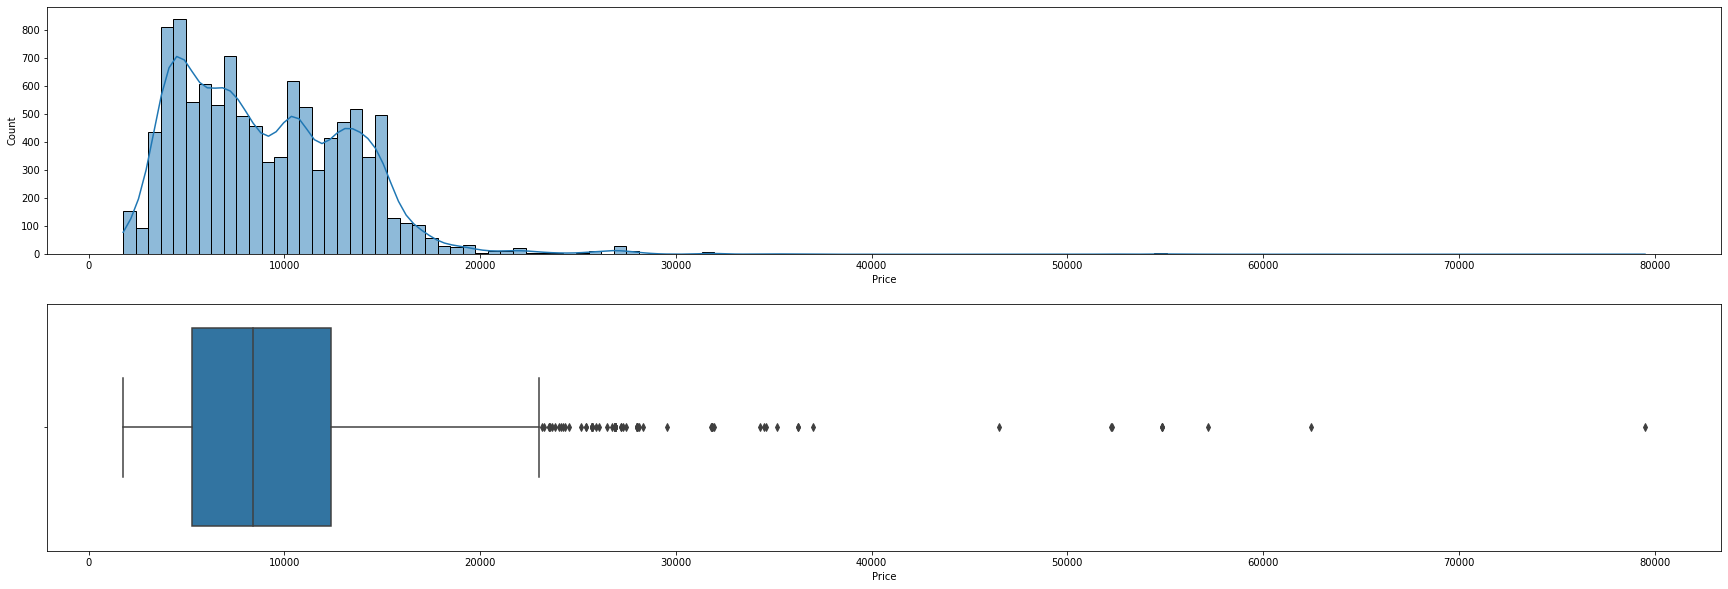

In [44]:
plot(data_train,"Price")

<Figure size 2160x720 with 0 Axes>

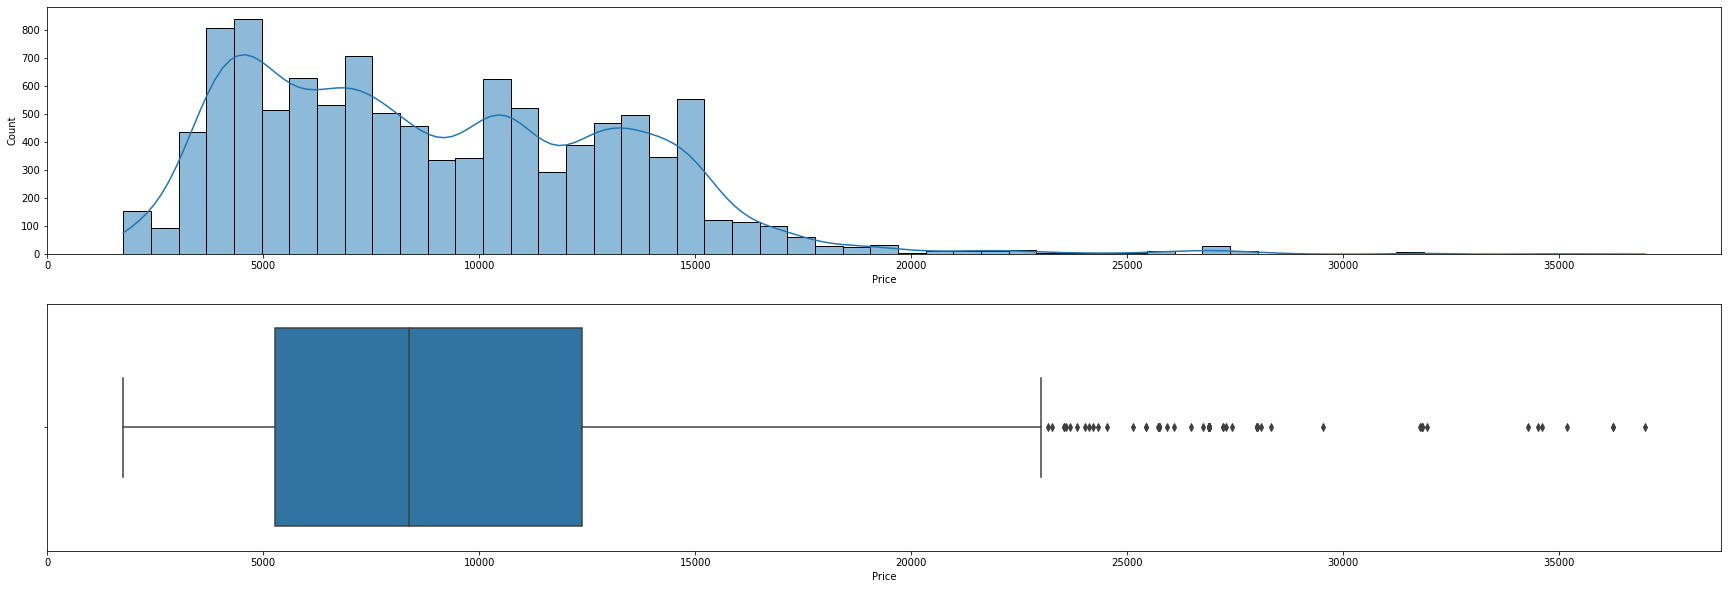

In [45]:
data_train["Price"] = np.where(data_train["Price"]>=40000,data_train["Price"].median(), data_train["Price"])
plot(data_train,"Price")

In [46]:
data_train = data_train.dropna()

**Model**

In [47]:
x = data_train.drop("Price",axis=1)
y = data_train["Price"]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [49]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2)

In [68]:
def predict(ml_model):
    model = ml_model.fit(X_train,Y_train)

    print(f"Training score: {round(model.score(X_train,Y_train), 2)}")
    Y_prediction = model.predict(X_test)

    print(f"Predicitons are: {Y_prediction[:4]}")
    print("\n")

    mse =  metrics.mean_squared_error(Y_test, Y_prediction)
    print(f"MSE: {round(mse, 2)}")

    plt.figure(figsize = (30, 10))
    sns.histplot(Y_test - Y_prediction, kde = True) 

Training score: 0.95
Predicitons are: [12182.02   6716.96  14205.121  5063.01 ]


MSE: 3867716.32


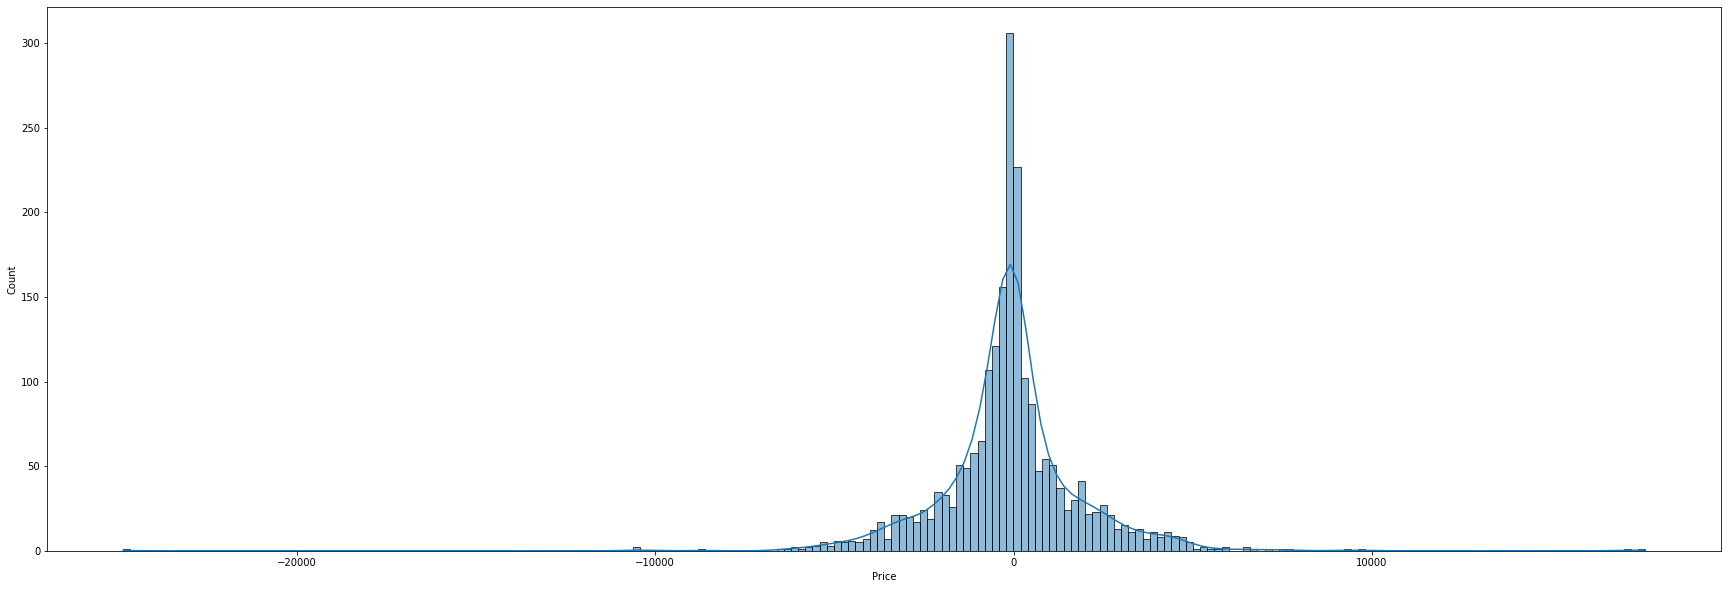

In [69]:
predict(RandomForestRegressor())

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

Training score: 0.58
Predicitons are: [11683.35840559  6467.53135946 11705.21647311  6011.75648349]


MSE: 8585548.11


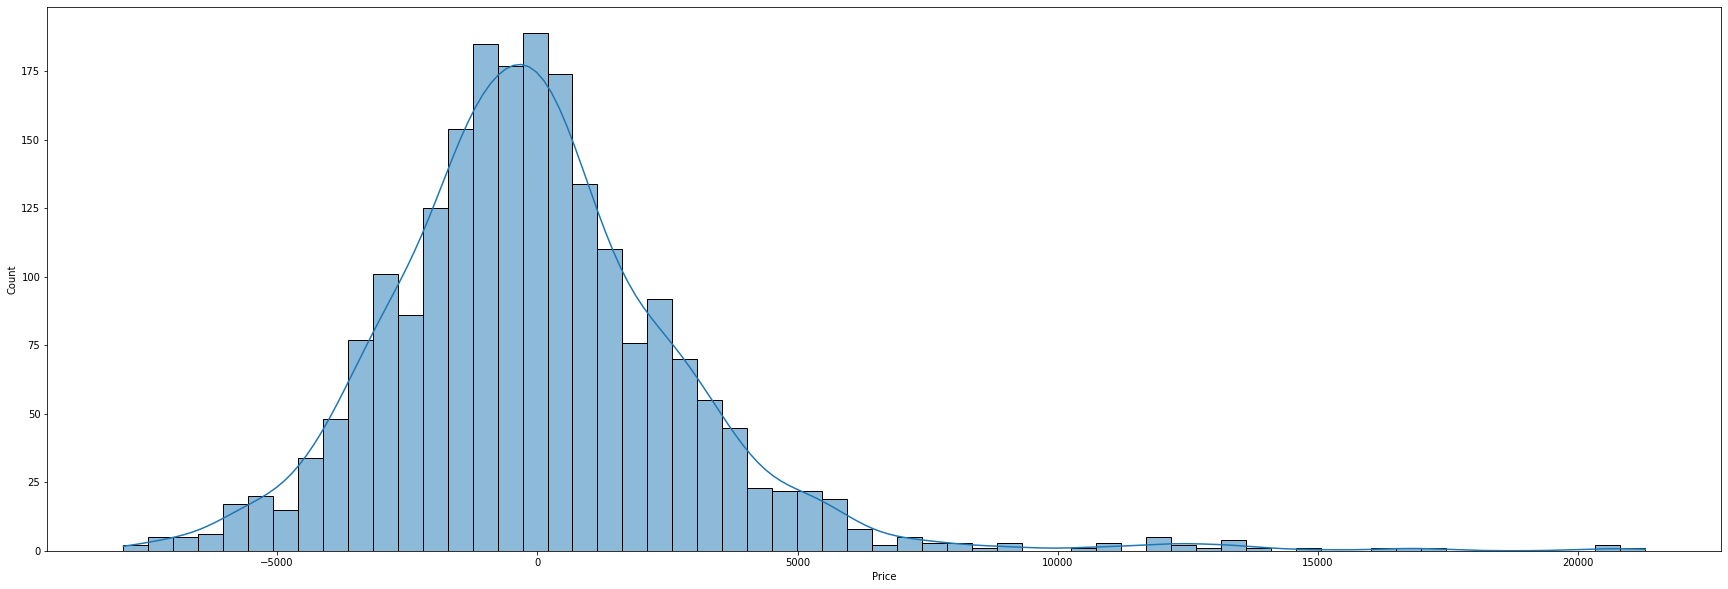

In [71]:
predict(LinearRegression())

Training score: 0.97
Predicitons are: [10368.  4176. 14781.  6762.]


MSE: 6234800.19


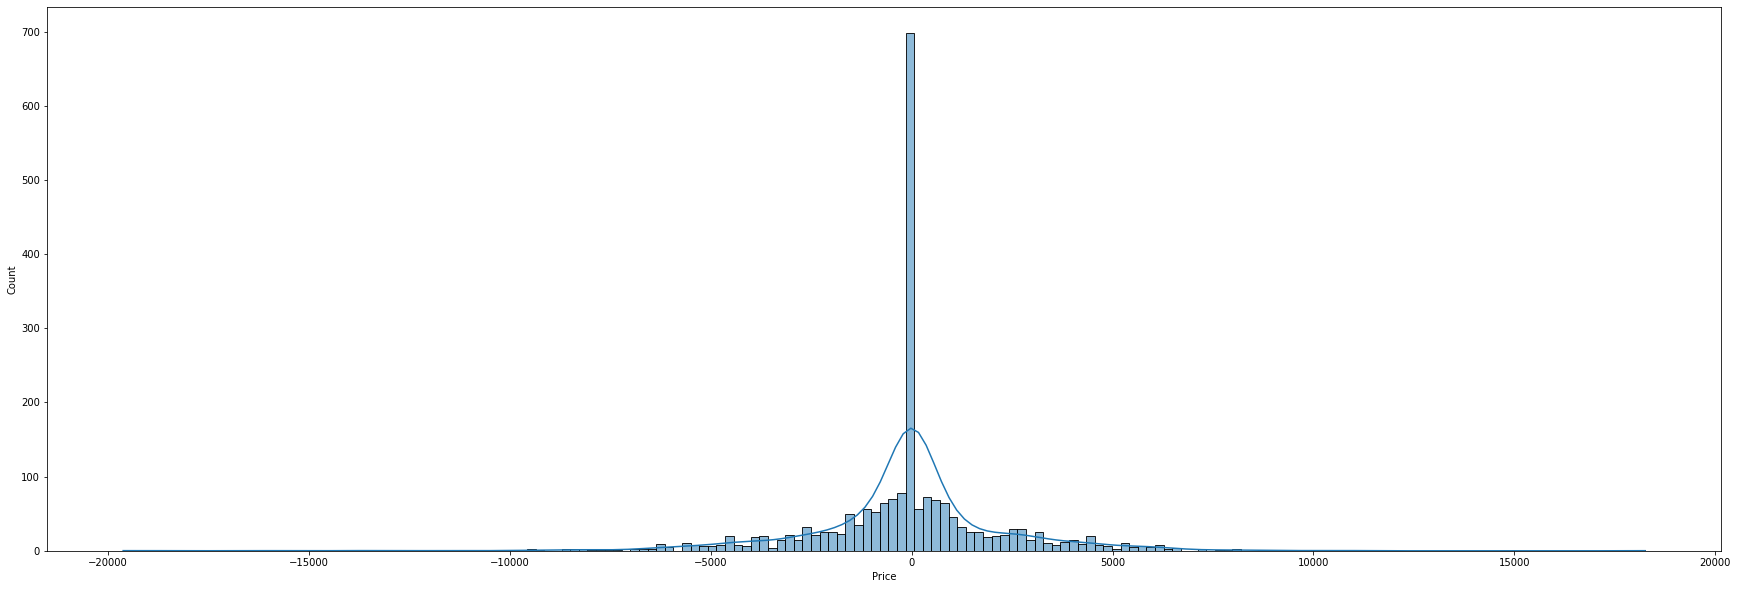

In [72]:
predict(DecisionTreeRegressor())

**Hyperparameters**

In [77]:
from sklearn.model_selection import GridSearchCV

In [85]:
n_estimators = [int(x) for x in np.linspace(start = 100,stop = 1200,num = 6)]
max_depth = [int(x) for x in np.linspace(5,30,num = 4)]
min_samples_split = [5, 10, 15, 100]


param_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [86]:
%%capture
grid = GridSearchCV(estimator = RandomForestRegressor(), param_grid= param_grid, n_jobs= -1, cv = 3)
grid_result = grid.fit(x, y)

In [88]:
grid_result.best_params_

{'max_depth': 21, 'min_samples_split': 10, 'n_estimators': 1200}

Training score: 0.92
Predicitons are: [12153.90229292  6493.36114571 13318.43673485  5087.89214957]


MSE: 3390432.95


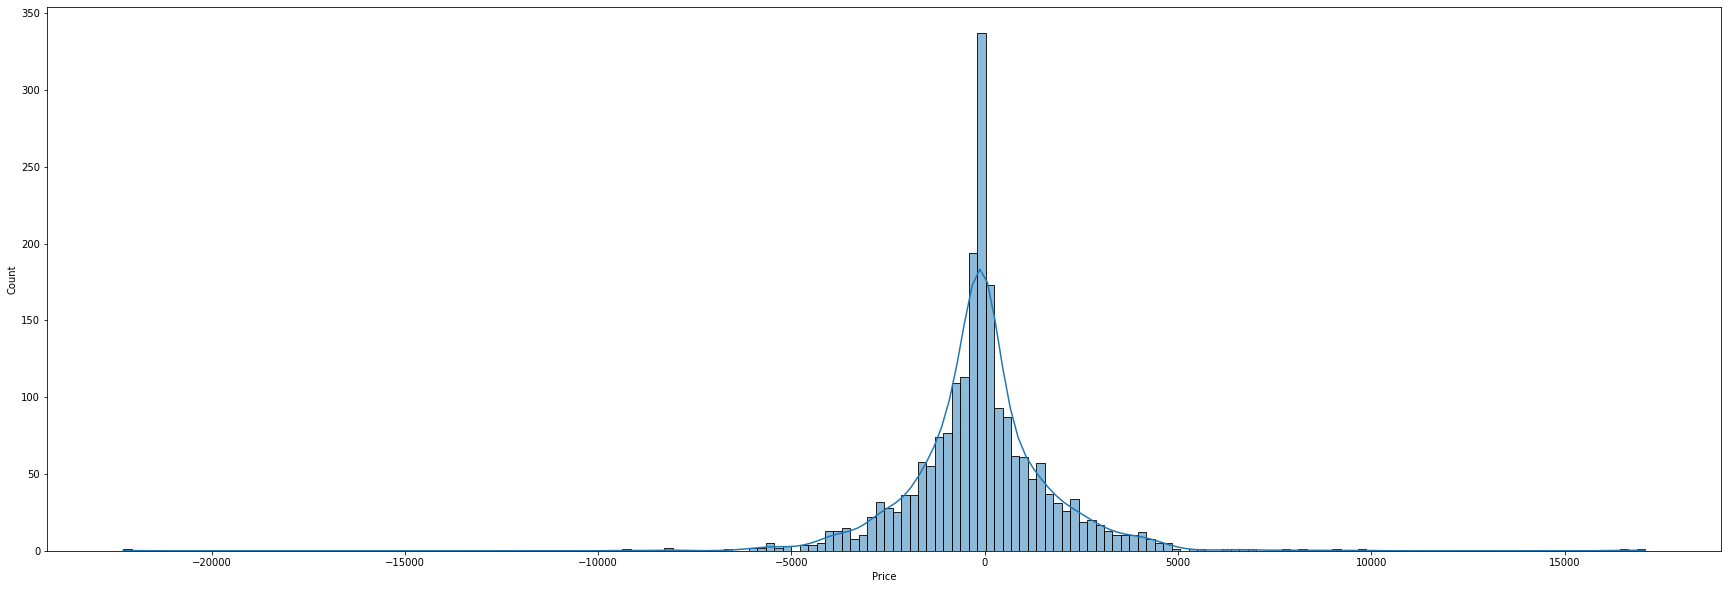

In [89]:
predict(RandomForestRegressor(max_depth = 21, min_samples_split = 10, n_estimators=1200))